In [2]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from kd_export import train_light_ce, test_light_ce, train_light_ce_and_kd, test_light_ce_and_kd

Organizing dataset...

+------------+-------------------------+------------------------+
| Tool       |   Training Images Moved |   Testing Images Moved |
+============+=========================+========================+
| bottle     |                     209 |                     20 |
+------------+-------------------------+------------------------+
| cable      |                     224 |                     58 |
+------------+-------------------------+------------------------+
| capsule    |                     219 |                     23 |
+------------+-------------------------+------------------------+
| carpet     |                     280 |                     28 |
+------------+-------------------------+------------------------+
| grid       |                     264 |                     21 |
+------------+-------------------------+------------------------+
| hazelnut   |                     391 |                     40 |
+------------+-------------------------+-------------

d:\Arcade Projects\Knowledge_Distillation_Testing\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Arcade Projects\Knowledge_Distillation_Testing\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Arcade Projects\Knowledge_Distillation_Testing\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Teacher Accuracy: 93.15%
Instantiate the student model.
Instantiate a copy of the student model.

######################################################################
Cross-entropy runs with student model: 
Epoch 1/10, Training Loss: 0.9812757584092381
Epoch 1/10, Validation Loss: 0.2336
Epoch 2/10, Training Loss: 0.23103155885505808
Epoch 2/10, Validation Loss: 0.0724
Epoch 3/10, Training Loss: 0.1626922757375044
Epoch 3/10, Validation Loss: 0.0937
Epoch 4/10, Training Loss: 0.14730474684428382
Epoch 4/10, Validation Loss: 0.1297
Epoch 5/10, Training Loss: 0.08138654422741588
Epoch 5/10, Validation Loss: 0.0428
Epoch 6/10, Training Loss: 0.08718902701102607
Epoch 6/10, Validation Loss: 0.0235
Epoch 7/10, Training Loss: 0.07697852219680099
Epoch 7/10, Validation Loss: 0.0571
Epoch 8/10, Training Loss: 0.07001397544409374
Epoch 8/10, Validation Loss: 0.0225
Epoch 9/10, Training Loss: 0.03678114222798236
Epoch 9/10, Validation Loss: 0.0075
Epoch 10/10, Training Loss: 0.0732666260737460

Knowledge distillation run
--------------------------

<Figure size 640x480 with 0 Axes>

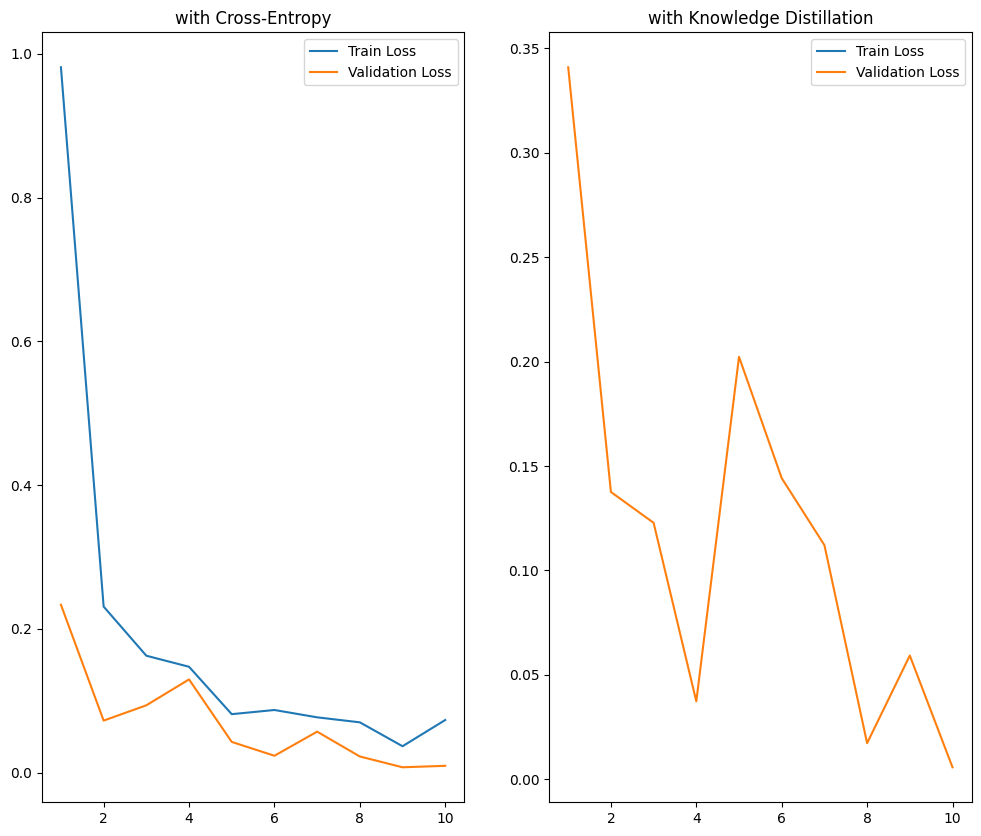

In [3]:
test_accuracy_light_ce = test_light_ce[1]["accuracy"] * 100
test_accuracy_light_ce_and_kd = test_light_ce_and_kd[1]["accuracy"] * 100

plt.suptitle("Training and Validation Loss of Student model", fontsize=16)

# Visualize the loss scores of student model - ce
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_light_ce[0], label="Train Loss")
plt.plot(range(1, 11), train_light_ce[1], label="Validation Loss")
# plt.axhline(y=test_accuracy_light_ce, color='red', linestyle='--', label='Test Accuracy')
plt.legend(loc='upper right')
plt.title('with Cross-Entropy')

# Visualize the loss scores of student model - ce + kd
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), train_light_ce_and_kd[0], label="Train Loss")
plt.plot(range(1, 11), train_light_ce_and_kd[1], label="Validation Loss")
# plt.axhline(y=test_accuracy_light_ce_and_kd, color='red', linestyle='--', label='Test Accuracy')
plt.legend(loc='upper right')
plt.title('with Knowledge Distillation')
plt.show()


<Figure size 800x600 with 0 Axes>

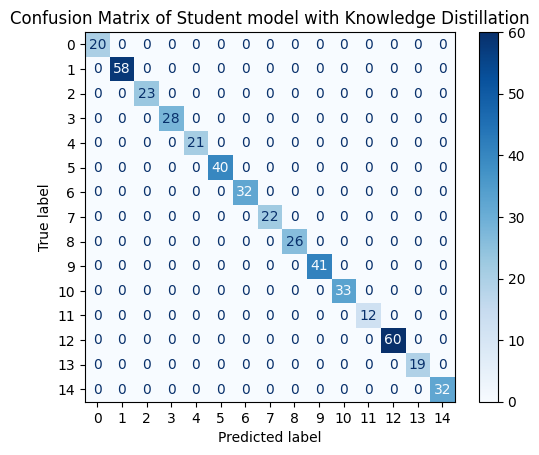

In [4]:
# Generate the confusion matrix
cm = test_light_ce_and_kd[0]
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Student model with Knowledge Distillation")
plt.show()